# forced damped spring

We are interested in the motion of a damped spring:
$$
\begin{align}
x''(t) + 2\gamma x'(t) + \omega^2 x(t) = F(t)
\end{align}
$$

$\gamma$ is the damping parameter (inverse time scale), $\omega$ is the natural frequency of resonance.


In [26]:
import numpy as np
from numpy.fft import fft, ifft, fftfreq
from scipy.signal import hilbert
import matplotlib.pyplot as plt

In [76]:
T, dt = 20., .5/24.
t = np.arange(0,T,dt)
f = fftfreq(t.size,dt)

omega = 1.95
gamma = 1/20.

F = np.cos(2.*np.pi*2*t)
F += np.cos(2.*np.pi*2.1*t)
H = lambda f: 1./(-f**2 + 2.j*gamma*f + omega**2)

x = np.real(ifft(H(f)*fft(F)))

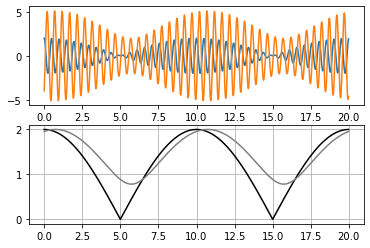

In [77]:
A = lambda x: np.abs(hilbert(np.real(x)))

ax = plt.subplot(211)
ax.plot(t,F)
ax.plot(t,x)
ax = plt.subplot(212)
ax.plot(t,A(F),'k')
ax.plot(t,A(x)*np.max(A(F))/np.max(A(x)),color='0.5')
ax.grid()

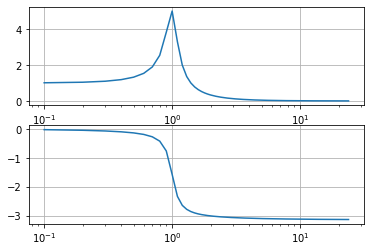

In [25]:

ip = np.where(f>0)
ax = plt.subplot(211)
ax.semilogx(f[ip],np.abs(H(f[ip])))
ax.grid()
ax = plt.subplot(212)
ax.semilogx(f[ip],np.angle(H(f[ip])))
ax.grid()